In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Task 01

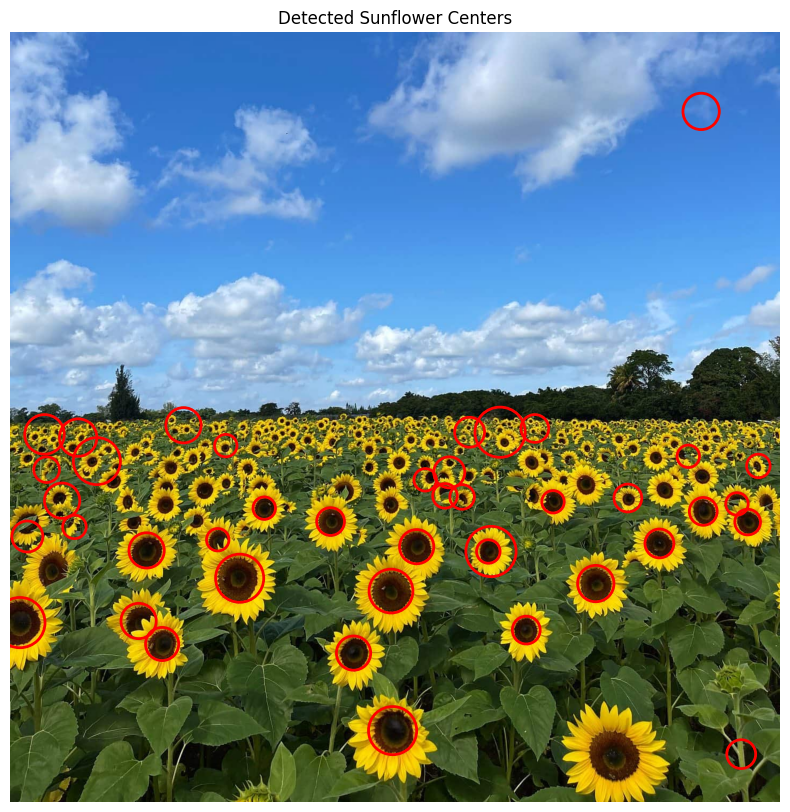

Detected circles (x, y, radius):
Center: (18, 1104), Radius: 47
Center: (1379, 916), Radius: 24
Center: (1296, 896), Radius: 26
Center: (1359, 882), Radius: 21
Center: (1268, 793), Radius: 21
Center: (1367, 1350), Radius: 27
Center: (715, 1306), Radius: 45
Center: (642, 1161), Radius: 32
Center: (965, 1118), Radius: 26
Center: (284, 1144), Radius: 31
Center: (240, 1101), Radius: 33
Center: (1095, 1031), Radius: 34
Center: (32, 943), Radius: 29
Center: (899, 971), Radius: 47
Center: (894, 971), Radius: 22
Center: (1214, 956), Radius: 27
Center: (120, 925), Radius: 22
Center: (712, 1045), Radius: 41
Center: (760, 962), Radius: 32
Center: (845, 869), Radius: 23
Center: (1155, 871), Radius: 26
Center: (813, 867), Radius: 23
Center: (97, 876), Radius: 33
Center: (599, 915), Radius: 26
Center: (776, 837), Radius: 21
Center: (429, 1021), Radius: 45
Center: (388, 949), Radius: 21
Center: (475, 890), Radius: 21
Center: (68, 818), Radius: 24
Center: (821, 823), Radius: 29
Center: (1399, 811), Ra

In [9]:
# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpeg'  # Update the path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur to reduce noise and improve blob detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Step 2: Enhance contrast with Histogram Equalization
    equalized = cv2.equalizeHist(blurred)

    # Step 3: Apply Otsu's thresholding to create a binary mask
    _, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 4: Find contours (potential circles)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Draw detected contours
    output_image = image.copy()
    largest_circles = []

    for contour in contours:
        # Fit a minimum enclosing circle to each contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Filter based on size to ignore small or excessively large areas
        if 20 < radius < 50:  # Adjust this range based on your image's sunflower size
            # Store the largest circles
            largest_circles.append((center, radius))
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the results using matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(output_image_rgb)
    ax.set_title('Detected Sunflower Centers')
    ax.axis('off')

    # Draw each detected blob as a circle
    for center, radius in largest_circles:
        circle = Circle(center, radius, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)

    plt.show()

    # Report parameters of the largest circles
    print("Detected circles (x, y, radius):")
    for center, radius in largest_circles:
        print(f"Center: {center}, Radius: {radius}")


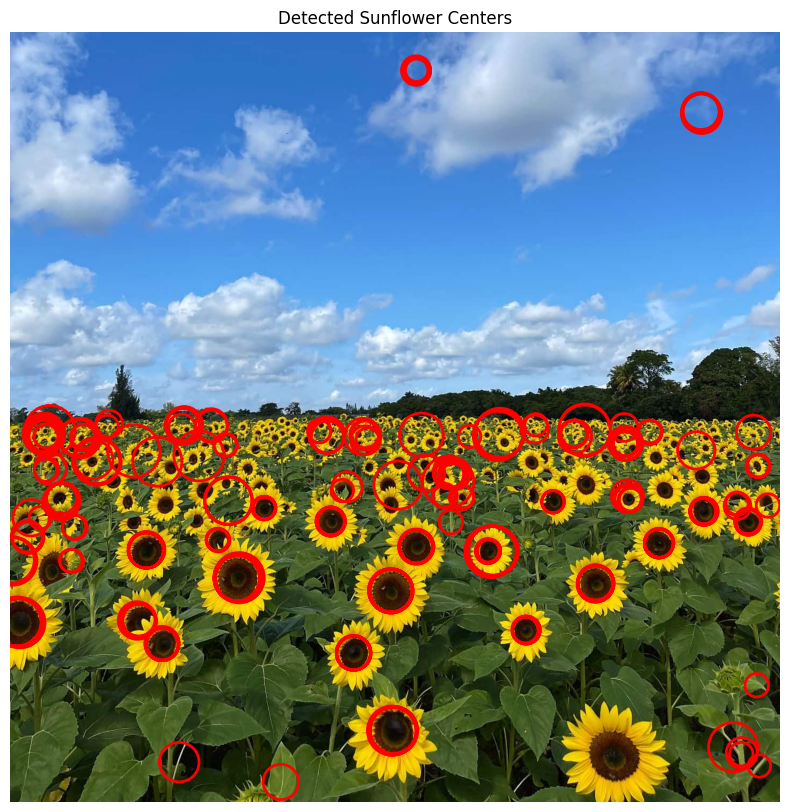

Detected circles (x, y, radius):
Center: (1380, 916), Radius: 25
Center: (1297, 896), Radius: 26
Center: (1360, 886), Radius: 25
Center: (506, 1402), Radius: 33
Center: (1401, 1372), Radius: 21
Center: (316, 1365), Radius: 37
Center: (1352, 1337), Radius: 46
Center: (714, 1306), Radius: 46
Center: (1396, 1221), Radius: 22
Center: (642, 1161), Radius: 32
Center: (965, 1118), Radius: 26
Center: (284, 1143), Radius: 32
Center: (237, 1100), Radius: 35
Center: (1094, 1032), Radius: 34
Center: (115, 989), Radius: 22
Center: (32, 943), Radius: 30
Center: (898, 971), Radius: 48
Center: (893, 971), Radius: 23
Center: (1213, 956), Radius: 27
Center: (121, 926), Radius: 23
Center: (824, 916), Radius: 22
Center: (711, 1044), Radius: 41
Center: (759, 962), Radius: 33
Center: (95, 878), Radius: 34
Center: (1154, 867), Radius: 30
Center: (600, 915), Radius: 27
Center: (428, 1020), Radius: 47
Center: (389, 950), Radius: 22
Center: (474, 890), Radius: 22
Center: (819, 841), Radius: 48
Center: (778, 824

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpeg'  # Update path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image is loaded
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define the range of sigma values
    sigma_values = np.linspace(1, 10, 10)

    # Initialize list to store largest circles
    largest_circles = []

    for sigma in sigma_values:
        # Step 1: Apply Gaussian Blur to reduce noise and improve blob detection
        blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

        # Step 2: Enhance contrast with Histogram Equalization
        equalized = cv2.equalizeHist(blurred)

        # Step 3: Apply Otsu's thresholding to create a binary mask
        _, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Step 4: Find contours (potential circles)
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Step 5: Draw detected contours
        output_image = image.copy()

        for contour in contours:
            # Fit a minimum enclosing circle to each contour
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Filter based on size to ignore small or excessively large areas
            if 20 < radius < 50:  # Adjust this range based on your image's sunflower size
                # Store the largest circles
                largest_circles.append((center, radius))
                cv2.circle(output_image, center, radius, (0, 255, 0), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the results using matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(output_image_rgb)
    ax.set_title('Detected Sunflower Centers')
    ax.axis('off')

    # Draw each detected blob as a circle
    for center, radius in largest_circles:
        circle = Circle(center, radius, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)

    plt.show()

    # Report parameters of the largest circles
    print("Detected circles (x, y, radius):")
    for center, radius in largest_circles:
        print(f"Center: {center}, Radius: {radius}")

    # Report the range of sigma values used
    print(f"Range of sigma values used: {sigma_values}")